<a href="https://colab.research.google.com/github/Mayank1498/Ashutosh-PMishra/blob/main/MayankLab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/iris.csv',header=None)
df.columns=['SL','SW','PL','PW','Target']
df

,SL,SW,PL,PW,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='Target', ylabel='count'>

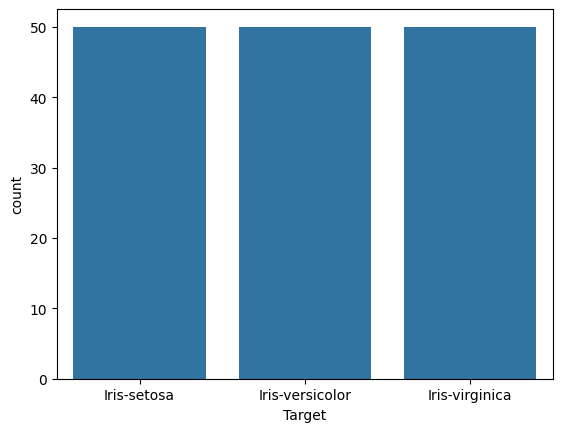

In [ ]:
import seaborn as sns
sns.countplot(x=df['Target'])

<Axes: >

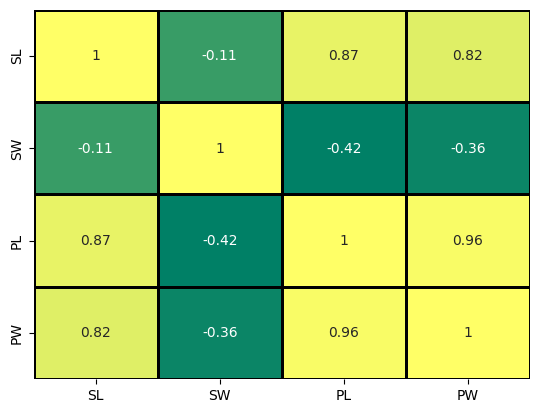

In [ ]:
# Correlation analysis b/w features
c=df[['SL','SW','PL','PW']].corr()
sns.heatmap(c,annot=True,cbar=False,cmap='summer',linewidth=2,linecolor='black')

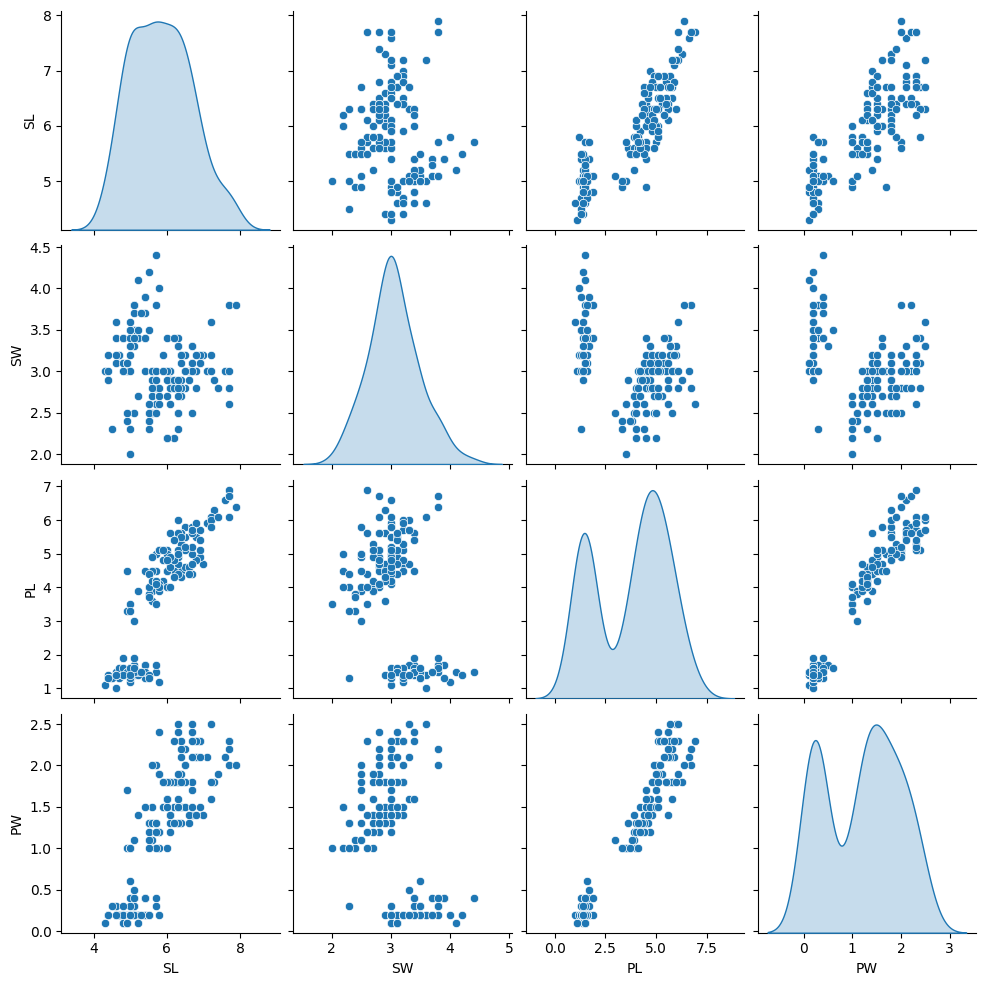

In [ ]:
# Exploratory data analysis [EDA]
sns.pairplot(df[['SL','SW','PL','PW']],diag_kind='kde')

In [ ]:
# Handle categorical Data
df.info()
df['Target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Target  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
Target,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
di={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Target']=df['Target'].map(di)
df['Target'].value_counts()

,count
Target,
0,50
1,50
2,50


In [ ]:
y=df['Target']
x=df.drop(['Target'],axis=1)
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training accuracy=',train_acc)
print('Testing Accuracy=',test_acc)

Training accuracy= 0.9714285714285714
Testing Accuracy= 0.9333333333333333


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



<function matplotlib.pyplot.show(close=None, block=None)>

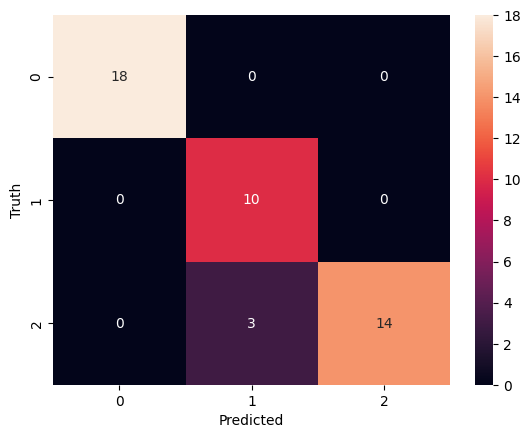

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True)
import matplotlib.pyplot as plt
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show